In [1]:
import pandas as pd

dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.29. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
datapath = '../example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [3]:
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


<AxesSubplot:>

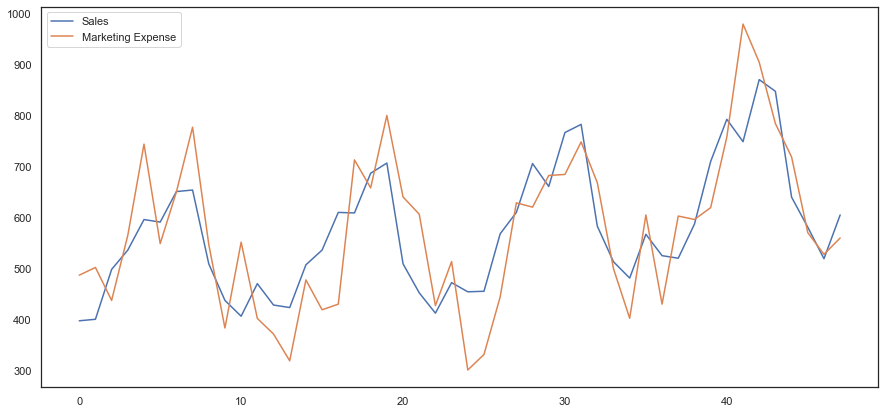

In [4]:
dataset[['Sales', 'Marketing Expense']].plot(figsize=(15,7))

# Train Model

In [5]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [6]:
FORECAST_PERIOD = 3

In [7]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [8]:
model = auto_timeseries(
    score_type='rmse',
    model_type='best', verbose=0
)        

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 2 regression: c autolag: None
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |       -2.9756149283863       |
|           p-value           |     0.03723526746722655      |
|          #Lags Used         |             2.0              |
| Number of Observations Used |             42.0             |
|     Critical Value (1%)     |      -3.596635636000432      |
|     Critical Value (5%)     |      -2.933297331821618      |
|     Critical Value (10%)    |     -2.6049909750566895      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_col

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3
    RMSE = 42.30
    Std Deviation of Originals = 141.57
    Normalized RMSE = 30%
Cross Validation window: 1 completed
    RMSE = 20.71
    Std Deviation of Originals = 77.02
    Normalized RMSE = 27%
Cross Validation window: 2 completed
    RMSE = 53.09
    Std Deviation of Originals = 91.70
    Normalized RMSE = 58%
Cross Validation window: 3 completed
Average CV RMSE over 3 windows (macro) = 38.70133
Average CV RMSE of all predictions (micro) = 40.97552
  End of Prophet Cross Validation
Time Taken = 9 seconds
---------------------------
Final Prophet CV results:
---------------------------
    RMSE = 40.98
    Std Deviation of Originals = 132.62
    Normalized RMSE = 31%


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=538.638, Time=0.06 sec
 ARIM

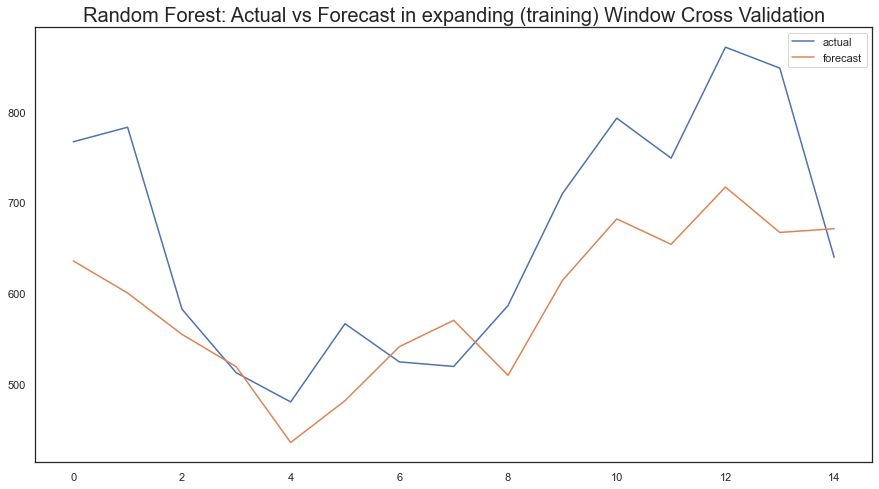

In [9]:
model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [12]:
model.get_leaderboard()

,name,rmse
0,Prophet,38.701333
1,auto_SARIMAX,99.011776
3,ML,99.740920
2,VAR,145.516547


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

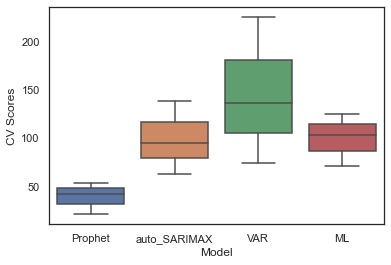

In [13]:
model.plot_cv_scores()

In [14]:
# make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,42.295438
1,Prophet,20.714416
2,Prophet,53.094146
3,auto_SARIMAX,95.012327
4,auto_SARIMAX,63.108923
5,auto_SARIMAX,138.914078
6,VAR,136.370535
7,VAR,73.948309
8,VAR,226.230798
9,ML,103.121352


In [15]:
results_dict = model.get_ml_dict()

In [16]:
results_dict['Prophet']['forecast'] 

30    744.724675
31    743.351955
32    636.819126
33    554.072877
34    528.884062
35    571.095940
36    518.564732
37    521.874599
38    630.746653
39    696.963054
40    749.061298
41    751.077316
42    796.892396
43    783.206753
44    689.698240
Name: yhat, dtype: float64

In [17]:
results_dict['auto_SARIMAX']['forecast']

[array([620.47397191, 638.03996568, 607.29052781, 546.5944208 ,
        511.57462747]),
 array([592.75432054, 527.015064  , 584.44045078, 580.32615036,
        587.32472274]),
 array([646.13502639, 718.74323314, 689.71800077, 645.97483963,
        622.01434425])]

In [18]:
results_dict['VAR']['forecast'] 

[Sales             yhat    mean_se  mean_ci_lower  mean_ci_upper
 2013-07-01  607.659038  52.127148     505.491706     709.826370
 2013-08-01  546.955357  66.694023     416.237473     677.673240
 2013-09-01  488.373955  75.882759     339.646480     637.101431
 2013-10-01  461.925158  78.925808     307.233417     616.616898
 2013-11-01  463.244161  81.413652     303.676336     622.811986,
 Sales             yhat    mean_se  mean_ci_lower  mean_ci_upper
 2013-12-01  480.288655  60.537627     361.637087     598.940223
 2014-01-01  507.267484  78.716066     352.986831     661.548138
 2014-02-01  533.838800  89.754802     357.922620     709.754980
 2014-03-01  559.430682  93.157017     376.846284     742.015080
 2014-04-01  573.776349  94.501681     388.556458     758.996241,
 Sales             yhat    mean_se  mean_ci_lower  mean_ci_upper
 2014-05-01  668.760844  65.791134     539.812590     797.709098
 2014-06-01  616.280382  86.695050     446.361206     786.199558
 2014-07-01  560.135187

In [19]:
results_dict['ML']['forecast'] # This has CV implemented, but currently does not return the forecast values from the CV (maybe a future enhancement)

[]

# Forecast Results

In [20]:
# Actual Test
test

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [21]:
# Using Best Model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914384,583.514622,619.753943,689.848631,689.979125,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322088
1,2014-11-01,696.096980,548.658728,585.281044,695.792950,696.382784,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386906
2,2014-12-01,702.080136,621.984300,657.436573,701.482461,702.659723,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156207


In [22]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='ML'
)
future_predictions

,yhat,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,516.915,NaN,NaN,NaN
2014-11-01,501.845,NaN,NaN,NaN
2014-12-01,502.665,NaN,NaN,NaN


In [23]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914384,583.448414,619.399773,689.858760,689.961340,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322088
1,2014-11-01,696.096980,549.722019,586.186721,695.839548,696.320515,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386906
2,2014-12-01,702.080136,623.333621,658.180805,701.560653,702.588349,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156207


In [24]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='auto_SARIMAX'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,614.597700,62.886966,491.341511,737.853888
2014-11-01,613.551709,68.730187,478.843018,748.260400
2014-12-01,633.870155,69.809714,497.045630,770.694679


In [26]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target),
    model='VAR'
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,545.905049,69.326752,410.027112,681.782986
2014-11-01,494.892930,93.805621,311.037291,678.748569
2014-12-01,467.040893,107.508295,256.328508,677.753279
